# ChIP-Seq Peaks analysis
* Donor6
* Donor7
* Donor8

### MACS2 logs

In [15]:
from macs2_logs import macs2_logs

macs2_logs('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01').head(15)

Processing macs2 logs /mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01


,sample,tags,redundant_rate,paired_peaks,fragment,alternatives,peaks
0,donor6_input_5_hg19_15000000_macs2_hg19.log,11715805,0.02,3035,44,"44,142,177,193,236,301,447,498,550",396
1,donor6_k27ac_5_hg19_15000000_macs2_hg19.log,13032585,0.02,53264,143,"143,293",16268
2,donor6_k27me3_5_hg19_15000000_macs2_hg19.log,12721543,0.03,39892,291,"4,291",18934
3,donor6_k4me3_5_hg19_15000000_macs2_hg19.log,12637816,0.02,51756,150,"2,150,305",17660
4,donor7_input_5_hg19_15000000_macs2_hg19.log,11645523,0.02,3312,44,"44,139,185,225,287,397,431,454,486,579",414
5,donor7_k27ac_5_hg19_15000000_macs2_hg19.log,13236406,0.03,71794,242,242,37888
6,donor7_k27me3_5_hg19_15000000_macs2_hg19.log,12627565,0.04,30150,295,"4,295",13086
7,donor7_k4me3_5_hg19_15000000_macs2_hg19.log,12917021,0.03,31204,285,285,10162
8,donor8_input_5_hg19_15000000_macs2_hg19.log,12424987,0.02,1778,45,"45,129,184,224,281,437,458,532",347
9,donor8_k27ac_5_hg19_15000000_macs2_hg19.log,13495216,0.07,75807,149,"4,149",42057


### Peaks intersection

In [16]:
%matplotlib inline
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

def len2(df):
    return (df.end - df.start).sum()

def processvenn3(file):
    df = pd.read_csv(file, sep='\t')
    donor6 = df.columns[5]
    donor7 = df.columns[6]
    donor8 = df.columns[7]
    fig = plt.figure(figsize=(4, 4))
    # (Abc, aBc, ABc, abC, AbC, aBC, ABC)
    print(donor6, len2(df[df.list.apply(lambda x: '1' in x)]))
    print(donor7, len2(df[df.list.apply(lambda x: '2' in x)]))
    print(donor8, len2(df[df.list.apply(lambda x: '3' in x)]))
    Abc = len2(df[df.list == '1'])
    aBc = len2(df[df.list == '2'])
    ABc = len2(df[df.list == '1,2'])
    abC = len2(df[df.list == '3'])
    AbC = len2(df[df.list == '1,3'])
    aBC = len2(df[df.list == '2,3'])
    ABC = len2(df[df.list == '1,2,3'])
    venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), set_labels = (donor6, donor7, donor8))
    plt.show()

# Peaks intersection length

Please ensure that you have created intersection data by calling
```
multiIntersectBed -header -i *k27ac*.bed > k27ac.csv
multiIntersectBed -header -i *k4me3*.bed > k4me3.csv
multiIntersectBed -header -i *k27me3*.bed > k27me3.csv
```



donor6_k4me3_5_hg19_15000000_0.001_peaks.bed 2328357
donor7_k4me3_5_hg19_15000000_0.001_peaks.bed 2391546
donor8_k4me3_5_hg19_15000000_0.001_peaks.bed 2558147


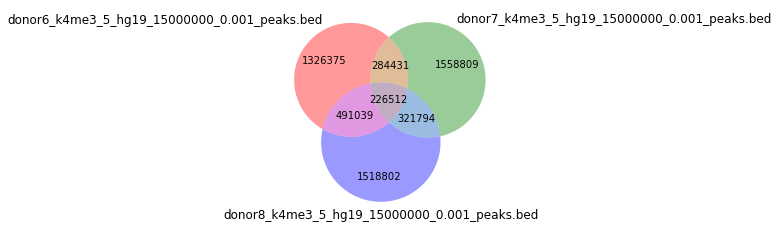

donor6_k4me3_5_hg19_15000000_0.01_peaks.bed 4440618
donor7_k4me3_5_hg19_15000000_0.01_peaks.bed 4790449
donor8_k4me3_5_hg19_15000000_0.01_peaks.bed 4766214


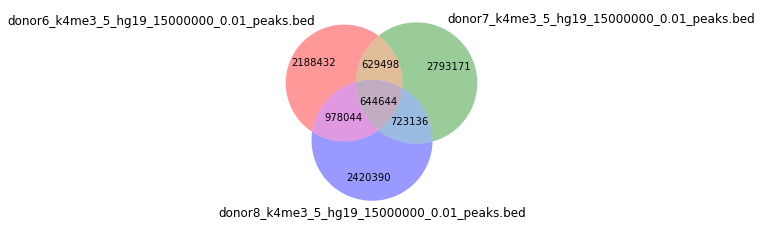

donor6_k4me3_5_hg19_15000000_0.1_peaks.bed 8687539
donor7_k4me3_5_hg19_15000000_0.1_peaks.bed 11116283
donor8_k4me3_5_hg19_15000000_0.1_peaks.bed 8733900


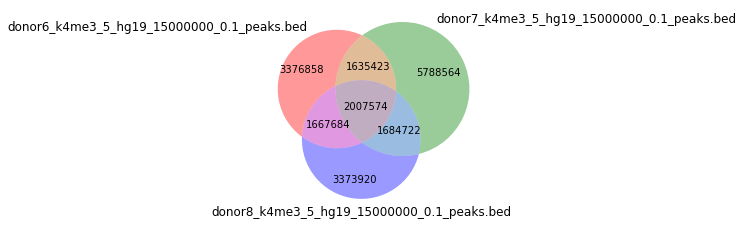

In [26]:
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.001/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.1/k4me3.csv')
# processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k27me3.csv')
# processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_0.01/k27ac.csv')

donor6_k4me3_5_hg19_0.001_peaks.bed 4948612
donor7_k4me3_5_hg19_0.001_peaks.bed 8005809
donor8_k4me3_5_hg19_0.001_peaks.bed 11772813


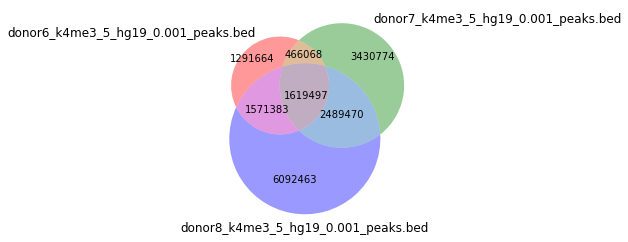

donor6_k4me3_5_hg19_0.01_peaks.bed 9726997
donor7_k4me3_5_hg19_0.01_peaks.bed 13183308
donor8_k4me3_5_hg19_0.01_peaks.bed 17112385


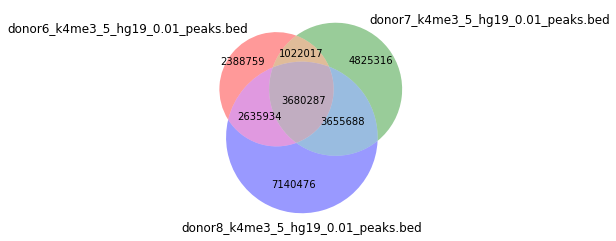

donor6_k4me3_5_hg19_0.1_peaks.bed 18336232
donor7_k4me3_5_hg19_0.1_peaks.bed 24079283
donor8_k4me3_5_hg19_0.1_peaks.bed 31592272


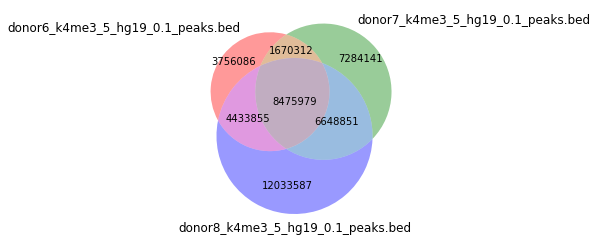

In [28]:
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_macs_0.001/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_macs_0.01/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_macs_0.1/k4me3.csv')
# processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_macs_0.01/k27me3.csv')
# processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_macs_0.01/k27ac.csv')

# Broad peaks
`multiIntersectBed -header -i *k4me3*.broadPeak > k4me3.csv`

donor6_k4me3_5_hg19_broad_0.001_peaks.broadPeak 19199574
donor7_k4me3_5_hg19_broad_0.001_peaks.broadPeak 24304858
donor8_k4me3_5_hg19_broad_0.001_peaks.broadPeak 32231549


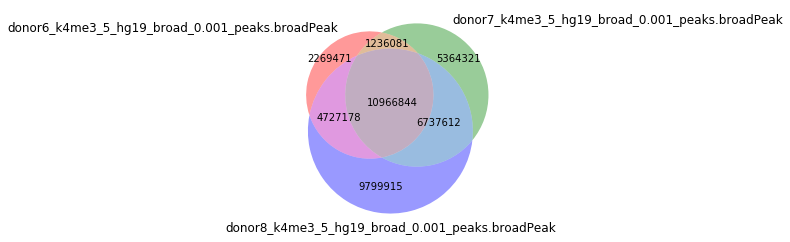

donor6_k4me3_5_hg19_broad_0.01_peaks.broadPeak 31004524
donor7_k4me3_5_hg19_broad_0.01_peaks.broadPeak 36248457
donor8_k4me3_5_hg19_broad_0.01_peaks.broadPeak 42994623


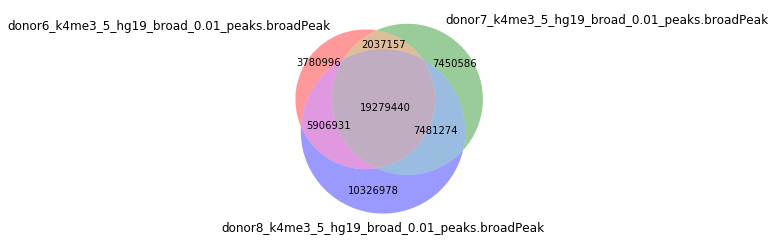

donor6_k4me3_5_hg19_broad_0.1_peaks.broadPeak 52302818
donor7_k4me3_5_hg19_broad_0.1_peaks.broadPeak 67496061
donor8_k4me3_5_hg19_broad_0.1_peaks.broadPeak 77274451


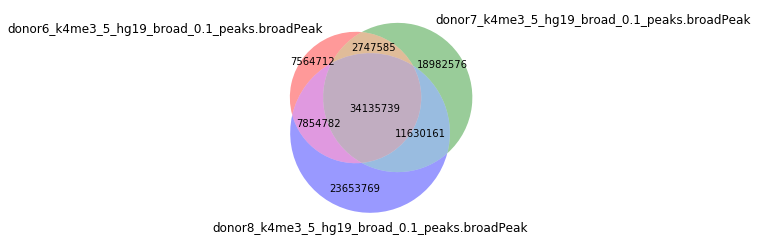

donor6_k4me3_5_hg19_15000000_broad_0.1_peaks.broadPeak 28976787
donor7_k4me3_5_hg19_15000000_broad_0.1_peaks.broadPeak 34599410
donor8_k4me3_5_hg19_15000000_broad_0.1_peaks.broadPeak 27506663


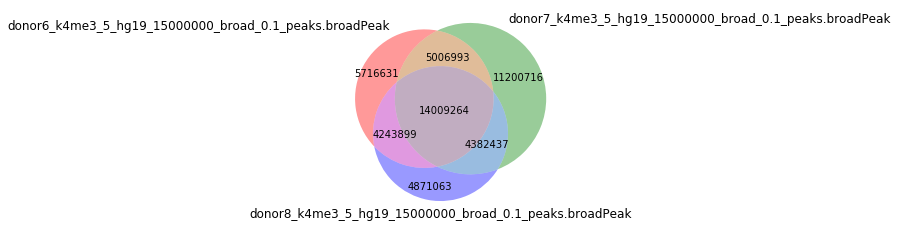

In [36]:
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_macs_broad_0.001/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_macs_broad_0.01/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_macs_broad_0.1/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/run_6_run_7_trim_bams_subsampled_macs_broad_0.1/k4me3.csv')

# ENCODE Broad k4me3 peaks intersection
```
# For all
multiIntersectBed -header -i Broad*k4me3*.bed > Broadk4me3.csv

# 0.001
multiIntersectBed -header -i Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.001_peaks.bed Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.001_peaks.bed  UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.001_peaks.bed > k4me3.csv

# 0.01
multiIntersectBed -header -i Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.01_peaks.bed Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.01_peaks.bed UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.01_peaks.bed > k4me3.csv

# 0.1
multiIntersectBed -header -i Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.1_peaks.bed  Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.1_peaks.bed UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.1_peaks.bed > k4me3.csv

```

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.001_peaks.bed 26626584
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.001_peaks.bed 23055068
UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.001_peaks.bed 18559156


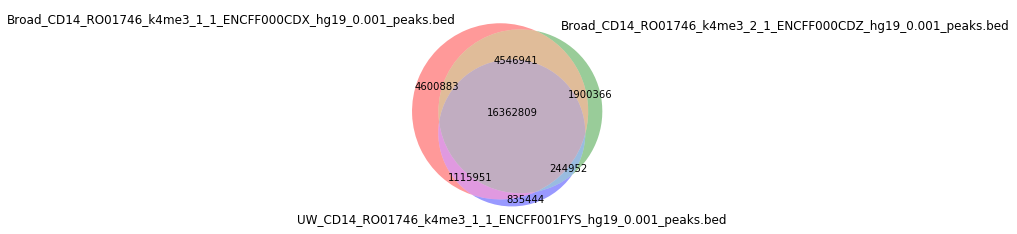

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.01_peaks.bed 33320982
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.01_peaks.bed 29532281
UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.01_peaks.bed 21911439


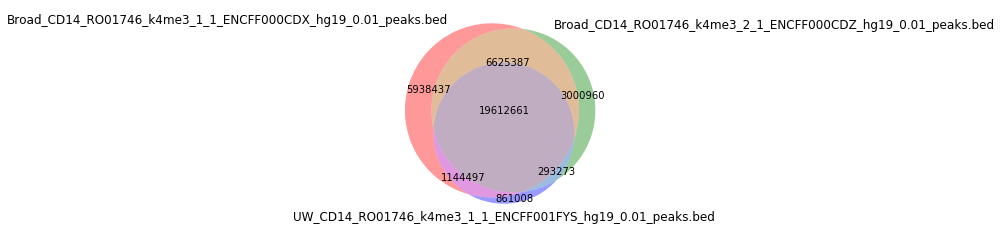

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.1_peaks.bed 41141739
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.1_peaks.bed 37855483
UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.1_peaks.bed 23912503


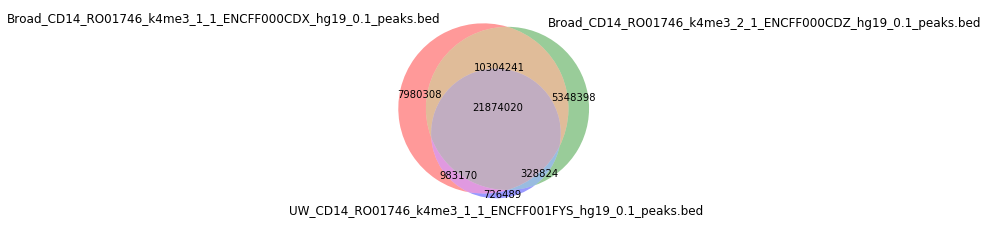

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.001_peaks.bed 26626584
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_0.001_peaks.bed 22982515
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.001_peaks.bed 23055068


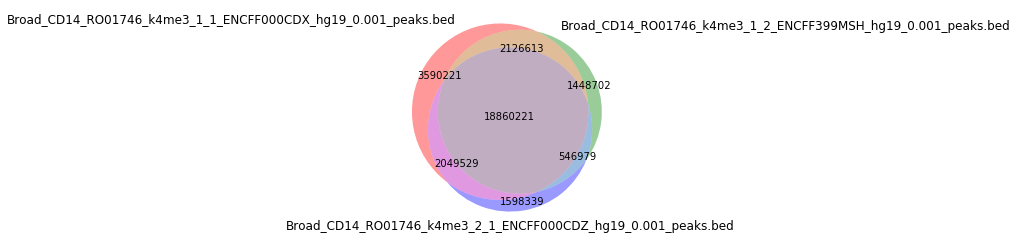

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.01_peaks.bed 33320982
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_0.01_peaks.bed 28353228
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.01_peaks.bed 29532281


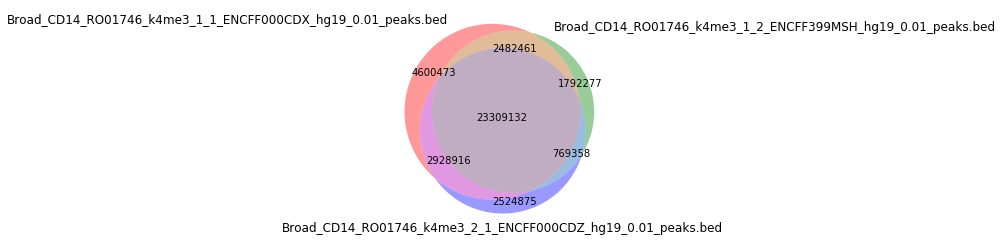

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.1_peaks.bed 41141739
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_0.1_peaks.bed 33225126
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.1_peaks.bed 37855483


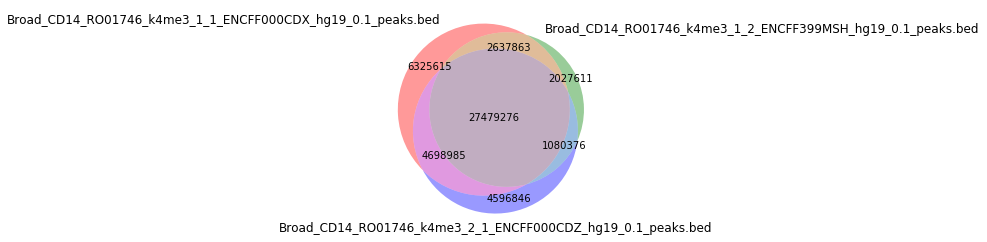

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_15000000_0.001_peaks.bed 24008700
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_15000000_0.001_peaks.bed 18068069
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_15000000_0.001_peaks.bed 21827071


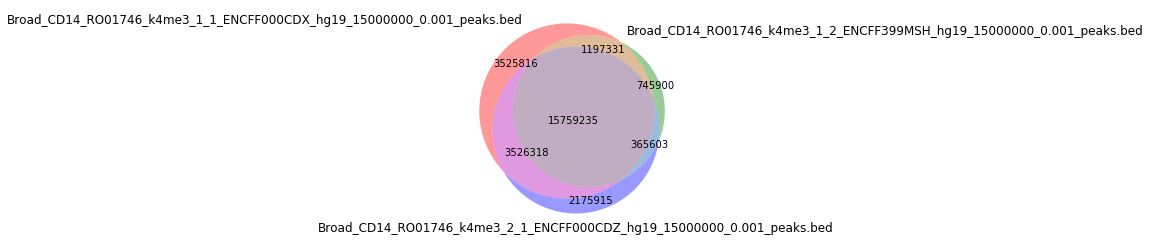

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_15000000_0.01_peaks.bed 28503768
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_15000000_0.01_peaks.bed 20567469
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_15000000_0.01_peaks.bed 25879498


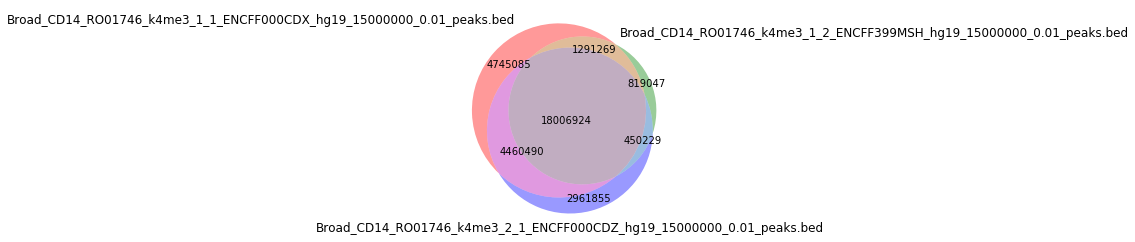

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_15000000_0.1_peaks.bed 34940482
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_15000000_0.1_peaks.bed 24212159
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_15000000_0.1_peaks.bed 32356451


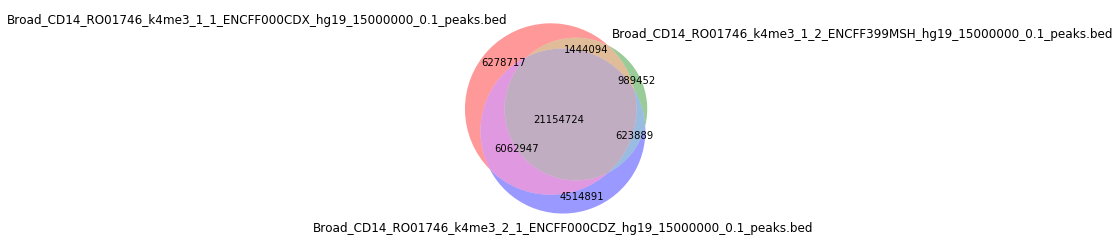

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_broad_0.001_peaks.broadPeak 31520300
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_broad_0.001_peaks.broadPeak 25538889
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_broad_0.001_peaks.broadPeak 27899737


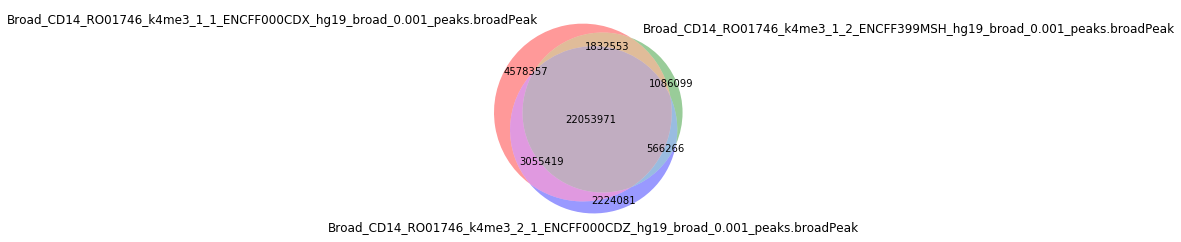

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_broad_0.01_peaks.broadPeak 43175718
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_broad_0.01_peaks.broadPeak 34298427
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_broad_0.01_peaks.broadPeak 39256404


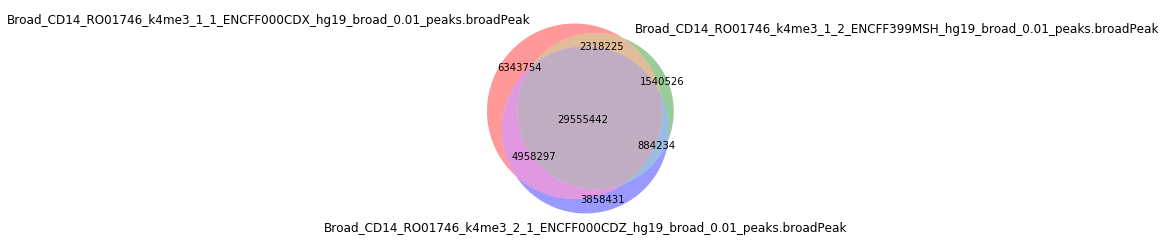

Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_broad_0.1_peaks.broadPeak 55421909
Broad_CD14_RO01746_k4me3_1_2_ENCFF399MSH_hg19_broad_0.1_peaks.broadPeak 41720798
Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_broad_0.1_peaks.broadPeak 53143974


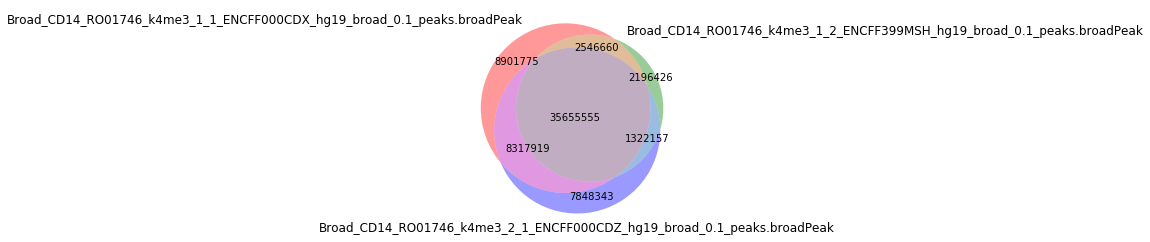

In [39]:
# Broad vs UW
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_0.001/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_0.01/k4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_0.1/k4me3.csv')

# No subsampling
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_0.001/Broadk4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_0.01/Broadk4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_0.1/Broadk4me3.csv')

# Subsampling
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_subsampled_macs_0.001/Broadk4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_subsampled_macs_0.01/Broadk4me3.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_subsampled_macs_0.1/Broadk4me3.csv')

# Broad peaks
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_broad_0.001/k4me3_broad.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_broad_0.01/k4me3_broad.csv')
processvenn3('/mnt/washu/artyomov_lab_aging/encode_bams_macs_broad_0.1/k4me3_broad.csv')

# METAPEAKS ENCODE data
```
# Metapeaks among Broad datasets
# bash ~/work/washu/metapeaks.sh Broad*.bed

# Metapeaks among Broad biological replicates and UW
cd encode_bams_macs_0.1
bash ~/work/washu/metapeaks.sh Broad_CD14_RO01746_k4me3_*_1*.bed UW_*_peaks.bed
cd ../encode_bams_macs_0.01
bash ~/work/washu/metapeaks.sh Broad_CD14_RO01746_k4me3_*_1*.bed UW_*_peaks.bed
cd ../encode_bams_macs_0.001
bash ~/work/washu/metapeaks.sh Broad_CD14_RO01746_k4me3_*_1*.bed UW_*_peaks.bed
```
Output:
```
CHRFILES: Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.1_peaks.bed.chr_only.tmp Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.1_peaks.bed.chr_only.tmp UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.1_peaks.bed.chr_only.tmp
PEAKS:    56383    51491    34910
0	0	1	1042
0	1	0	6101
0	1	1	298
1	0	0	10695
1	0	1	1122
1	1	0	13117
1	1	1	29255

CHRFILES: Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.01_peaks.bed.chr_only.tmp Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.01_peaks.bed.chr_only.tmp UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.01_peaks.bed.chr_only.tmp
PEAKS:    45486    39688    32608
0	0	1	1332
0	1	0	2985
0	1	1	245
1	0	0	8035
1	0	1	1478
1	1	0	7621
1	1	1	26854
CHRFILES: Broad_CD14_RO01746_k4me3_1_1_ENCFF000CDX_hg19_0.001_peaks.bed.chr_only.tmp Broad_CD14_RO01746_k4me3_2_1_ENCFF000CDZ_hg19_0.001_peaks.bed.chr_only.tmp UW_CD14_RO01746_k4me3_1_1_ENCFF001FYS_hg19_0.001_peaks.bed.chr_only.tmp
PEAKS:    36847    34276    30816
It looks as though you have less than 3 columns at line: 36847.  Are you sure your files are tab-delimited?
0	0	1	1317
0	1	0	1780
0	1	1	219
1	0	0	6435
1	0	1	1523
1	1	0	4971
1	1	1	22868
```

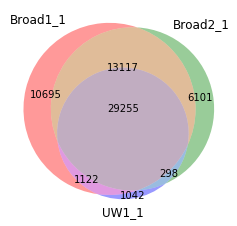

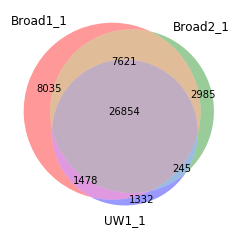

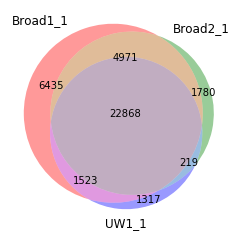

In [3]:
%matplotlib inline
import pandas as pd
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

def showvenn3(s1, s2, s3, abC, aBc, aBC, Abc, AbC, ABc, ABC):
    fig = plt.figure(figsize=(4, 4))
    venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), set_labels = (s1, s2, s3))
    plt.show()
    
# Q=0.1
showvenn3('Broad1_1', 'Broad2_1', 'UW1_1', 1042, 6101, 298, 10695, 1122, 13117, 29255)
# Q=0.01
showvenn3('Broad1_1', 'Broad2_1', 'UW1_1', 1332, 2985, 245, 8035, 1478, 7621, 26854)
# Q=0.001
showvenn3('Broad1_1', 'Broad2_1', 'UW1_1', 1317, 1780, 219, 6435, 1523, 4971, 22868)

# METAPEAKS run6_run7
```
cd run_6_run_7_trim_bams_macs_0.1
bash ~/work/washu/metapeaks.sh *k4me3*.bed
cd ../run_6_run_7_trim_bams_macs_0.01
bash ~/work/washu/metapeaks.sh *k4me3*.bed
cd ../run_6_run_7_trim_bams_macs_0.001
bash ~/work/washu/metapeaks.sh *k4me3*.bed
```
Output:
```
CHRFILES: donor6_k4me3_5_hg19_0.1_peaks.bed.chr_only.tmp donor7_k4me3_5_hg19_0.1_peaks.bed.chr_only.tmp donor8_k4me3_5_hg19_0.1_peaks.bed.chr_only.tmp
PEAKS:    61120    40715    83575
0	0	1	31218
0	1	0	7335
0	1	1	5806
1	0	0	11152
1	0	1	10893
1	1	0	1363
1	1	1	21494
CHRFILES: donor6_k4me3_5_hg19_0.01_peaks.bed.chr_only.tmp donor7_k4me3_5_hg19_0.01_peaks.bed.chr_only.tmp donor8_k4me3_5_hg19_0.01_peaks.bed.chr_only.tmp
PEAKS:    34991    24093    49681
0	0	1	17971
0	1	0	4258
0	1	1	4678
1	0	0	6915
1	0	1	8055
1	1	0	1179
1	1	1	12089
CHRFILES: donor6_k4me3_5_hg19_0.001_peaks.bed.chr_only.tmp donor7_k4me3_5_hg19_0.001_peaks.bed.chr_only.tmp donor8_k4me3_5_hg19_0.001_peaks.bed.chr_only.tmp
PEAKS:    19301    15588    36253
0	0	1	16796
0	1	0	3498
0	1	1	4159
1	0	0	4036
1	0	1	5289
1	1	0	636
1	1	1	6355
```

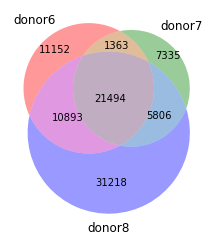

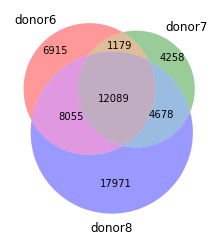

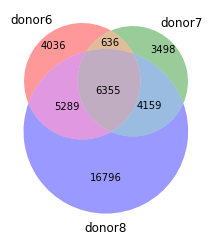

In [11]:
# Q=0.1
showvenn3('donor6', 'donor7', 'donor8', 31218, 7335, 5806, 11152, 10893, 1363, 21494)
# Q=0.01
showvenn3('donor6', 'donor7', 'donor8', 17971, 4258, 4678, 6915, 8055, 1179, 12089)
# Q=0.001
showvenn3('donor6', 'donor7', 'donor8', 16796, 3498, 4159, 4036, 5289, 636, 6355)

# METAPEAKS WIDE peaks run6_run7
```
cd run_6_run_7_trim_bams_macs_broad_0.1
bash ~/work/washu/metapeaks.sh *k4me3*.broadPeak
cd ../run_6_run_7_trim_bams_macs_broad_0.01
bash ~/work/washu/metapeaks.sh *k4me3*.broadPeak
cd ../run_6_run_7_trim_bams_macs_broad_0.001
bash ~/work/washu/metapeaks.sh *k4me3*.broadPeak
```
Output:
```
CHRFILES: donor6_k4me3_5_hg19_broad_0.1_peaks.broadPeak.chr_only.tmp donor7_k4me3_5_hg19_broad_0.1_peaks.broadPeak.chr_only.tmp donor8_k4me3_5_hg19_broad_0.1_peaks.broadPeak.chr_only.tmp
PEAKS:    41279    34787    57587
0	0	1	25606
0	1	0	9832
0	1	1	3569
1	0	0	9298
1	0	1	4871
1	1	0	814
1	1	1	19480
CHRFILES: donor6_k4me3_5_hg19_broad_0.01_peaks.broadPeak.chr_only.tmp donor7_k4me3_5_hg19_broad_0.01_peaks.broadPeak.chr_only.tmp donor8_k4me3_5_hg19_broad_0.01_peaks.broadPeak.chr_only.tmp
PEAKS:    26957    19368    30457
0	0	1	7739
0	1	0	2095
0	1	1	1463
1	0	0	3452
1	0	1	3512
1	1	0	344
1	1	1	14792
CHRFILES: donor6_k4me3_5_hg19_broad_0.001_peaks.broadPeak.chr_only.tmp donor7_k4me3_5_hg19_broad_0.001_peaks.broadPeak.chr_only.tmp donor8_k4me3_5_hg19_broad_0.001_peaks.broadPeak.chr_only.tmp
PEAKS:    20224    14869    25280
0	0	1	6410
0	1	0	1162
0	1	1	1800
1	0	0	1846
1	0	1	3632
1	1	0	206
1	1	1	11243
```

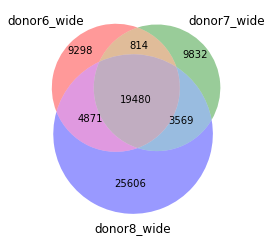

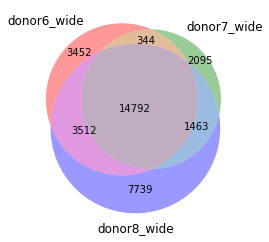

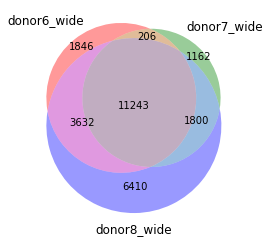

In [10]:
# Q=0.1
showvenn3('donor6_wide', 'donor7_wide', 'donor8_wide', 25606, 9832, 3569, 9298, 4871, 814, 19480)
# Q=0.01
showvenn3('donor6_wide', 'donor7_wide', 'donor8_wide', 7739, 2095, 1463, 3452, 3512, 344, 14792)
# Q=0.001
showvenn3('donor6_wide', 'donor7_wide', 'donor8_wide', 6410, 1162, 1800, 1846, 3632, 206, 11243)

In [6]:
%matplotlib inline
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

def processvenn2(file):
    df = pd.read_csv(file, sep='\t')
    sample1 = df.columns[5]
    sample2 = df.columns[6]
    fig = plt.figure(figsize=(4, 4))
    # (Ab, aB, AB)
    print(sample1, len2(df[df.list.apply(lambda x: '1' in x)]))
    print(sample2, len2(df[df.list.apply(lambda x: '2' in x)]))
    Ab = len2(df[df.list == '1'])
    aB = len2(df[df.list == '2'])
    AB = len2(df[df.list == '1,2'])
    venn2(subsets = (Ab, aB, AB), set_labels = (sample1, sample2))
    plt.show()

# Roadmap vs run6,7,8 Q=0.01
```
# Merge run6,7,8 peaks
cd run_6_run_7_trim_bams_subsampled_macs_0.01
bedtools merge -i donor6_k27me3_5_hg19_15000000_hg19_0.01_peaks.bed -i donor7_k27me3_5_hg19_15000000_hg19_0.01_peaks.bed -i donor8_k27me3_5_hg19_15000000_hg19_0.01_peaks.bed > merge_k27me3.bed

bedtools merge -i donor6_k27ac_5_hg19_15000000_hg19_0.01_peaks.bed -i donor7_k27ac_5_hg19_15000000_hg19_0.01_peaks.bed -i donor8_k27ac_5_hg19_15000000_hg19_0.01_peaks.bed > merge_k27ac.bed

bedtools merge -i donor6_k4me3_5_hg19_15000000_hg19_0.01_peaks.bed -i donor7_k4me3_5_hg19_15000000_hg19_0.01_peaks.bed -i donor8_k27me3_5_hg19_15000000_hg19_0.01_peaks.bed > merge_k4me3.bed
cd ..


# Merge roadmap peaks
cd roadmap_bams_subsampled_macs_0.01/
bedtools merge -i SRR787515_k4me3_hg19_15000000_hg19_0.01_peaks.bed -i SRR787516_k4me3_hg19_15000000_hg19_0.01_peaks.bed > merge_k4me3.bed

bedtools merge -i SRR787551_k27ac_hg19_15000000_hg19_0.01_peaks.bed -i SRR787552_k27ac_hg19_15000000_hg19_0.01_peaks.bed > merge_k27ac.bed
cd ..

mkdir roadmap_run678
cd roadmap_run678

multiIntersectBed -header -i ../run_6_run_7_trim_bams_subsampled_macs_0.01/merge_k27ac.bed ../roadmap_bams_subsampled_macs_0.01/merge_k27ac.bed > k27ac.csv

multiIntersectBed -header -i ../run_6_run_7_trim_bams_subsampled_macs_0.01/merge_k4me3.bed ../roadmap_bams_subsampled_macs_0.01/merge_k4me3.bed > k4me3.csv

multiIntersectBed -header -i ../run_6_run_7_trim_bams_subsampled_macs_0.01/merge_k27me3.bed ../roadmap_bams_subsampled_macs_0.01/SRR787528_k27me3_hg19_15000000_hg19_0.01_peaks.bed > k27me3.csv

```

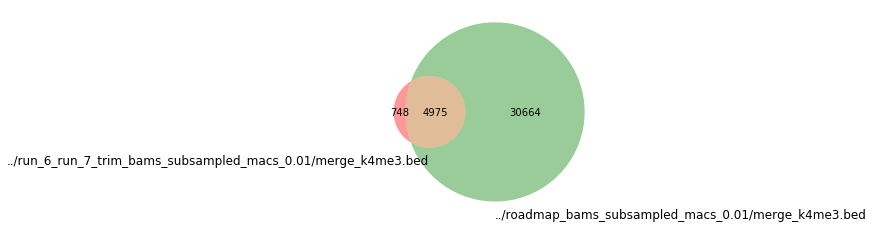

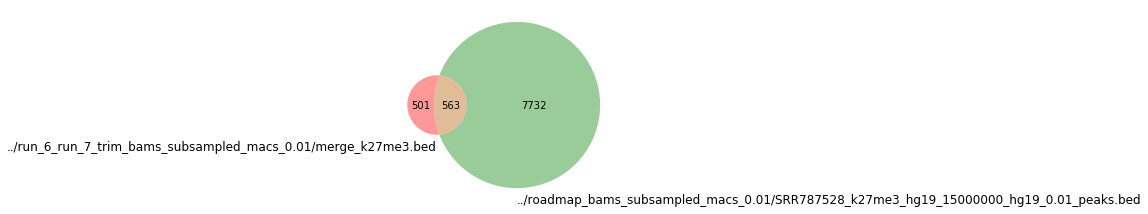

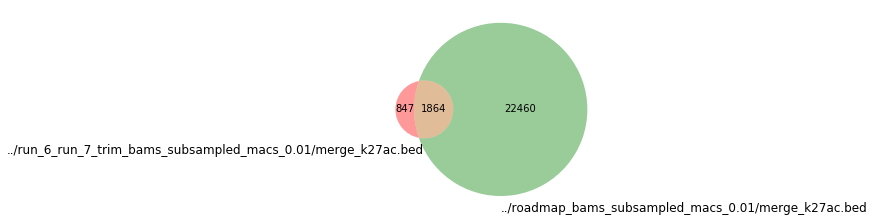

In [11]:
processvenn2('/mnt/washu/artyomov_lab_aging/roadmap_run678/k4me3.csv')
processvenn2('/mnt/washu/artyomov_lab_aging/roadmap_run678/k27me3.csv')
processvenn2('/mnt/washu/artyomov_lab_aging/roadmap_run678/k27ac.csv')